<a href="https://colab.research.google.com/github/misrori/coding2023/blob/main/session7_to_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data School: My top 25 pandas tricks ([video](https://www.youtube.com/watch?v=RlIiVeig3hc&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=35))

**See also:** "21 more pandas tricks" [video](https://www.youtube.com/watch?v=tWFQqaRtSQA&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=36) and [notebook](https://nbviewer.org/github/justmarkham/pandas-videos/blob/master/21_more_pandas_tricks.ipynb)

- Watch the [complete pandas video series](https://www.dataschool.io/easier-data-analysis-with-pandas/)
- Connect on [Twitter](https://twitter.com/justmarkham), [Facebook](https://www.facebook.com/DataScienceSchool/), and [LinkedIn](https://www.linkedin.com/in/justmarkham/)
- Subscribe on [YouTube](https://www.youtube.com/dataschool?sub_confirmation=1)
- Join the [email newsletter](https://www.dataschool.io/subscribe/)

## Load example datasets

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

<ipython-input-2-4617535c6180>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


## 1. Show installed versions

Sometimes you need to know the pandas version you're using, especially when reading the pandas documentation. You can show the pandas version by typing:

In [ ]:
pd.__version__

'1.5.3'

But if you also need to know the versions of pandas' dependencies, you can use the `show_versions()` function:

In [ ]:
pd.show_versions()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.15.120+
Version          : #1 SMP Wed Aug 30 11:19:59 UTC 2023
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.23.5
pytz             : 2023.3.post1
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.1.2
Cython           : 3.0.4
pytest           : 7.4.3
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.3
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.9
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli  

You can see the versions of Python, pandas, NumPy, matplotlib, and more.

## 2. Create an example DataFrame

Let's say that you want to demonstrate some pandas code. You need an example DataFrame to work with.

There are many ways to do this, but my favorite way is to pass a dictionary to the DataFrame constructor, in which the dictionary keys are the column names and the dictionary values are lists of column values:

In [ ]:
df = pd.DataFrame({'col one':[100, 200], 'col two':[300, 400]})
df

,col one,col two
0,100,300
1,200,400


Now if you need a much larger DataFrame, the above method will require way too much typing. In that case, you can use NumPy's `random.rand()` function, tell it the number of rows and columns, and pass that to the DataFrame constructor:

In [ ]:
pd.DataFrame(np.random.rand(5, 10))

,0,1,2,3,4,5,6,7,8,9
0,0.420603,0.635645,0.011747,0.124195,0.214767,0.715469,0.191222,0.624246,0.997725,0.304765
1,0.115206,0.130283,0.079538,0.269866,0.793565,0.380253,0.640941,0.390296,0.846333,0.449304
2,0.615760,0.611913,0.599204,0.719083,0.903054,0.157579,0.656498,0.736502,0.550540,0.678511
3,0.600676,0.873781,0.916435,0.974705,0.703554,0.660749,0.672835,0.555456,0.923249,0.485296
4,0.498484,0.590167,0.853817,0.486909,0.906525,0.711804,0.861692,0.925996,0.534398,0.247317


That's pretty good, but if you also want non-numeric column names, you can coerce a string of letters to a list and then pass that list to the columns parameter:

In [ ]:
pd.DataFrame(np.random.rand(4, 8), columns=list('abcdefgh'))

,a,b,c,d,e,f,g,h
0,0.322246,0.759936,0.637614,0.246070,0.980405,0.059744,0.614533,0.473666
1,0.875938,0.226521,0.574640,0.339574,0.802914,0.789854,0.427958,0.848112
2,0.221302,0.710257,0.372961,0.453100,0.576986,0.951466,0.360124,0.949437
3,0.537429,0.710380,0.407316,0.132162,0.712585,0.162299,0.191266,0.692261


As you might guess, your string will need to have the same number of characters as there are columns.

## 3. Rename columns

Let's take a look at the example DataFrame we created in the last trick:

In [ ]:
df

,col one,col two
0,100,300
1,200,400


I prefer to use dot notation to select pandas columns, but that won't work since the column names have spaces. Let's fix this.

The most flexible method for renaming columns is the `rename()` method. You pass it a dictionary in which the keys are the old names and the values are the new names, and you also specify the axis:

In [ ]:
df = df.rename(columns = {'col one':'col_one', 'col two':'col_two'})
# or
df.rename(columns = {'col one':'col_one', 'col two':'col_two'}, inplace=True)




In [ ]:
df

,col_one,col_two
0,100,300
1,200,400


The best thing about this method is that you can use it to rename any number of columns, whether it be just one column or all columns.

Now if you're going to rename all of the columns at once, a simpler method is just to overwrite the columns attribute of the DataFrame:

In [ ]:
df.columns = ['col_one', 'col_two']

Now if the only thing you're doing is replacing spaces with underscores, an even better method is to use the `str.replace()` method, since you don't have to type out all of the column names:

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

All three of these methods have the same result, which is to rename the columns so that they don't have any spaces:

In [ ]:
df

,col_one,col_two
0,100,300
1,200,400


Finally, if you just need to add a prefix or suffix to all of your column names, you can use the `add_prefix()` method...

In [ ]:
df.add_prefix('X_')

,X_col_one,X_col_two
0,100,300
1,200,400


...or the `add_suffix()` method:

In [ ]:
df.add_suffix('_Y')

,col_one_Y,col_two_Y
0,100,300
1,200,400


In [ ]:
df

,col_one,col_two
0,100,300
1,200,400


## 4. Reverse row order

Let's take a look at the drinks DataFrame:

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


This is a dataset of average alcohol consumption by country. What if you wanted to reverse the order of the rows?

The most straightforward method is to use the `loc` accessor and pass it `::-1`, which is the same slicing notation used to reverse a Python list:

In [ ]:
drinks.loc[::-1].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64,18,4,4.7,Africa
191,Zambia,32,19,4,2.5,Africa
190,Yemen,6,0,0,0.1,Asia
189,Vietnam,111,2,1,2.0,Asia
188,Venezuela,333,100,3,7.7,South America


What if you also wanted to reset the index so that it starts at zero?

You would use the `reset_index()` method and tell it to drop the old index entirely:

In [ ]:
drinks.loc[::-1].reset_index(drop=True).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Zimbabwe,64,18,4,4.7,Africa
1,Zambia,32,19,4,2.5,Africa
2,Yemen,6,0,0,0.1,Asia
3,Vietnam,111,2,1,2.0,Asia
4,Venezuela,333,100,3,7.7,South America


As you can see, the rows are in reverse order but the index has been reset to the default integer index.

## 5. Reverse column order

Similar to the previous trick, you can also use `loc` to reverse the left-to-right order of your columns:

In [ ]:
drinks.loc[:, ::-1].head()

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,country
0,Asia,0.0,0,0,0,Afghanistan
1,Europe,4.9,54,132,89,Albania
2,Africa,0.7,14,0,25,Algeria
3,Europe,12.4,312,138,245,Andorra
4,Africa,5.9,45,57,217,Angola


The colon before the comma means "select all rows", and the `::-1` after the comma means "reverse the columns", which is why "country" is now on the right side.

## 6. Select columns by data type

Here are the data types of the drinks DataFrame:

In [ ]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Let's say you need to select only the numeric columns. You can use the `select_dtypes()` method:

In [ ]:
drinks.select_dtypes(include='number').head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


This includes both int and float columns.

You could also use this method to select just the object columns:

In [ ]:
drinks.select_dtypes(include='object').head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


You can tell it to include multiple data types by passing a list:

In [ ]:
drinks.select_dtypes(include=['number', 'object', 'category', 'datetime']).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


You can also tell it to exclude certain data types:

In [ ]:
drinks.select_dtypes(exclude='number').head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


## 7. Convert strings to numbers

Let's create another example DataFrame:

In [ ]:
df = pd.DataFrame({'col_one':['1.1', '2.2', '3.3'],
                   'col_two':['4.4', '5.5', '6.6'],
                   'col_three':['7.7', '8.8', '-']})
df

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,-


These numbers are actually stored as strings, which results in object columns:

In [ ]:
df.dtypes

col_one      object
col_two      object
col_three    object
dtype: object

In order to do mathematical operations on these columns, we need to convert the data types to numeric. You can use the `astype()` method on the first two columns:

In [ ]:
# orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
df.astype({'col_one':'float', 'col_two':'float'}).dtypes

col_one      float64
col_two      float64
col_three     object
dtype: object

However, this would have resulted in an error if you tried to use it on the third column, because that column contains a dash to represent zero and pandas doesn't understand how to handle it.

Instead, you can use the `to_numeric()` function on the third column and tell it to convert any invalid input into `NaN` values:

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.
pd.to_numeric(df.col_three, errors='coerce')

0    7.7
1    8.8
2    NaN
Name: col_three, dtype: float64

If you know that the `NaN` values actually represent zeros, you can fill them with zeros using the `fillna()` method:

In [ ]:
pd.to_numeric(df.col_three, errors='coerce').fillna(0)

0    7.7
1    8.8
2    0.0
Name: col_three, dtype: float64

Finally, you can apply this function to the entire DataFrame all at once by using the `apply()` method:

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,0.0


This one line of code accomplishes our goal, because all of the data types have now been converted to float:

In [ ]:
df.dtypes

col_one      float64
col_two      float64
col_three    float64
dtype: object

## 8. Reduce DataFrame size

pandas DataFrames are designed to fit into memory, and so sometimes you need to reduce the DataFrame size in order to work with it on your system.

Here's the size of the drinks DataFrame:

In [ ]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


You can see that it currently uses 30.4 KB.

If you're having performance problems with your DataFrame, or you can't even read it into memory, there are two easy steps you can take during the file reading process to reduce the DataFrame size.

The first step is to only read in the columns that you actually need, which we specify with the "usecols" parameter:

In [ ]:
cols = ['beer_servings', 'continent']
small_drinks = pd.read_csv('http://bit.ly/drinksbycountry', usecols=cols)
small_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   beer_servings  193 non-null    int64 
 1   continent      193 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.7 KB


By only reading in these two columns, we've reduced the DataFrame size to 13.6 KB.

The second step is to convert any object columns containing categorical data to the category data type, which we specify with the "dtype" parameter:

In [ ]:
dtypes = {'continent':'category'}
smaller_drinks = pd.read_csv('http://bit.ly/drinksbycountry', usecols=cols, dtype=dtypes)
smaller_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   beer_servings  193 non-null    int64   
 1   continent      193 non-null    category
dtypes: category(1), int64(1)
memory usage: 2.4 KB


By reading in the continent column as the category data type, we've further reduced the DataFrame size to 2.3 KB.

Keep in mind that the category data type will only reduce memory usage if you have a small number of categories relative to the number of rows.

## 9. Build a DataFrame from multiple files (row-wise)

Let's say that your dataset is spread across multiple files, but you want to read the dataset into a single DataFrame.

For example, I have a small dataset of stock data in which each CSV file only includes a single day. Here's the first day:

In [ ]:
pd.read_csv('data/stocks1.csv')

Here's the second day:

In [ ]:
pd.read_csv('data/stocks2.csv')

,Date,Close,Volume,Symbol
0,2016-10-04,113.00,29736800,AAPL
1,2016-10-04,57.24,20085900,MSFT
2,2016-10-04,31.35,18460400,CSCO


And here's the third day:

In [ ]:
pd.read_csv('data/stocks3.csv')

,Date,Close,Volume,Symbol
0,2016-10-05,57.64,16726400,MSFT
1,2016-10-05,31.59,11808600,CSCO
2,2016-10-05,113.05,21453100,AAPL


You could read each CSV file into its own DataFrame, combine them together, and then delete the original DataFrames, but that would be memory inefficient and require a lot of code.

A better solution is to use the built-in glob module:

In [ ]:
from glob import glob

You can pass a pattern to `glob()`, including wildcard characters, and it will return a list of all files that match that pattern.

In this case, glob is looking in the "data" subdirectory for all CSV files that start with the word "stocks":

In [ ]:
stock_files = sorted(glob('data/stocks*.csv'))
stock_files

['data/stocks1.csv', 'data/stocks2.csv', 'data/stocks3.csv']

glob returns filenames in an arbitrary order, which is why we sorted the list using Python's built-in `sorted()` function.

We can then use a generator expression to read each of the files using `read_csv()` and pass the results to the `concat()` function, which will concatenate the rows into a single DataFrame:

In [ ]:
pd.concat((pd.read_csv(file) for file in stock_files))

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
0,2016-10-04,113.00,29736800,AAPL
1,2016-10-04,57.24,20085900,MSFT
2,2016-10-04,31.35,18460400,CSCO
0,2016-10-05,57.64,16726400,MSFT
1,2016-10-05,31.59,11808600,CSCO
2,2016-10-05,113.05,21453100,AAPL


Unfortunately, there are now duplicate values in the index. To avoid that, we can tell the `concat()` function to ignore the index and instead use the default integer index:

In [ ]:
pd.concat((pd.read_csv(file) for file in stock_files), ignore_index=True)

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


## 10. Build a DataFrame from multiple files (column-wise)

The previous trick is useful when each file contains rows from your dataset. But what if each file instead contains columns from your dataset?

Here's an example in which the drinks dataset has been split into two CSV files, and each file contains three columns:

In [ ]:
pd.read_csv('data/drinks1.csv').head()

,country,beer_servings,spirit_servings
0,Afghanistan,0,0
1,Albania,89,132
2,Algeria,25,0
3,Andorra,245,138
4,Angola,217,57


In [ ]:
pd.read_csv('data/drinks2.csv').head()

,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0.0,Asia
1,54,4.9,Europe
2,14,0.7,Africa
3,312,12.4,Europe
4,45,5.9,Africa


Similar to the previous trick, we'll start by using `glob()`:

In [ ]:
drink_files = sorted(glob('data/drinks*.csv'))

And this time, we'll tell the `concat()` function to concatenate along the columns axis:

In [ ]:
pd.concat((pd.read_csv(file) for file in drink_files), axis='columns').head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


Now our DataFrame has all six columns.

## 11. Create a DataFrame from the clipboard

Let's say that you have some data stored in an Excel spreadsheet or a [Google Sheet](https://docs.google.com/spreadsheets/d/1ipv_HAykbky8OXUubs9eLL-LQ1rAkexXG61-B4jd0Rc/edit?usp=sharing), and you want to get it into a DataFrame as quickly as possible.

Just select the data and copy it to the clipboard. Then, you can use the `read_clipboard()` function to read it into a DataFrame:

In [ ]:
df = pd.read_clipboard()
df

,Column A,Column B,Column C
0,1,4.4,seven
1,2,5.5,eight
2,3,6.6,nine


Just like the `read_csv()` function, `read_clipboard()` automatically detects the correct data type for each column:

In [ ]:
df.dtypes

Column A      int64
Column B    float64
Column C     object
dtype: object

Let's copy one other dataset to the clipboard:

In [ ]:
df = pd.read_clipboard()
df

,Left,Right
Alice,10,40
Bob,20,50
Charlie,30,60


Amazingly, pandas has even identified the first column as the index:

In [ ]:
df.index

Index(['Alice', 'Bob', 'Charlie'], dtype='object')

Keep in mind that if you want your work to be reproducible in the future, `read_clipboard()` is not the recommended approach.

## 12. Split a DataFrame into two random subsets

Let's say that you want to split a DataFrame into two parts, randomly assigning 75% of the rows to one DataFrame and the other 25% to a second DataFrame.

For example, we have a DataFrame of movie ratings with 979 rows:

In [ ]:
len(movies)

979

We can use the `sample()` method to randomly select 75% of the rows and assign them to the "movies_1" DataFrame:

In [ ]:
movies_1 = movies.sample(frac=0.75, random_state=1234)

Then we can use the `drop()` method to drop all rows that are in "movies_1" and assign the remaining rows to "movies_2":

In [ ]:
movies_2 = movies.drop(movies_1.index)

You can see that the total number of rows is correct:

In [ ]:
len(movies_1) + len(movies_2)

979

And you can see from the index that every movie is in either "movies_1":

In [ ]:
movies_1.index.sort_values()

Int64Index([  0,   2,   5,   6,   7,   8,   9,  11,  13,  16,
            ...
            966, 967, 969, 971, 972, 974, 975, 976, 977, 978],
           dtype='int64', length=734)

...or "movies_2":

In [ ]:
movies_2.index.sort_values()

Int64Index([  1,   3,   4,  10,  12,  14,  15,  18,  26,  30,
            ...
            931, 934, 937, 941, 950, 954, 960, 968, 970, 973],
           dtype='int64', length=245)

Keep in mind that this approach will not work if your index values are not unique.

## 13. Filter a DataFrame by multiple categories

Let's take a look at the movies DataFrame:

In [ ]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


One of the columns is genre:

In [ ]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

If we wanted to filter the DataFrame to only show movies with the genre Action or Drama or Western, we could use multiple conditions separated by the "or" operator:

In [ ]:
movies[(movies.genre == 'Action') |
       (movies.genre == 'Drama') |
       (movies.genre == 'Western')].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."


However, you can actually rewrite this code more clearly by using the `isin()` method and passing it a list of genres:

In [ ]:
movies[movies.genre.isin(['Action', 'Drama', 'Western'])].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."


And if you want to reverse this filter, so that you are excluding (rather than including) those three genres, you can put a tilde in front of the condition:

In [ ]:
movies[~movies.genre.isin(['Action', 'Drama', 'Western'])].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


This works because tilde is the "not" operator in Python.

## 14. Filter a DataFrame by largest categories

Let's say that you needed to filter the movies DataFrame by genre, but only include the 3 largest genres.

We'll start by taking the `value_counts()` of genre and saving it as a Series called counts:

In [ ]:
counts = movies.genre.value_counts()
counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

The Series method `nlargest()` makes it easy to select the 3 largest values in this Series:

In [ ]:
counts.nlargest(3)

Drama     278
Comedy    156
Action    136
Name: genre, dtype: int64

And all we actually need from this Series is the index:

In [ ]:
counts.nlargest(3).index

Index(['Drama', 'Comedy', 'Action'], dtype='object')

Finally, we can pass the index object to `isin()`, and it will be treated like a list of genres:

In [ ]:
movies[movies.genre.isin(counts.nlargest(3).index)].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


Thus, only Drama and Comedy and Action movies remain in the DataFrame.

## 15. Handle missing values

Let's look at a dataset of UFO sightings:

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


You'll notice that some of the values are missing.

To find out how many values are missing in each column, you can use the `isna()` method and then take the `sum()`:

In [ ]:
ufo.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

`isna()` generated a DataFrame of True and False values, and `sum()` converted all of the True values to 1 and added them up.

Similarly, you can find out the percentage of values that are missing by taking the `mean()` of `isna()`:

In [ ]:
ufo.isna().mean()

City               0.001371
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

If you want to drop the columns that have any missing values, you can use the `dropna()` method:

In [ ]:
ufo.dropna(axis='columns').head()

,State,Time
0,NY,1930-06-01 22:00:00
1,NJ,1930-06-30 20:00:00
2,CO,1931-02-15 14:00:00
3,KS,1931-06-01 13:00:00
4,NY,1933-04-18 19:00:00


Or if you want to drop columns in which more than 10% of the values are missing, you can set a threshold for `dropna()`:

In [ ]:
ufo.dropna(thresh=len(ufo)*0.9, axis='columns').head()

,City,State,Time
0,Ithaca,NY,1930-06-01 22:00:00
1,Willingboro,NJ,1930-06-30 20:00:00
2,Holyoke,CO,1931-02-15 14:00:00
3,Abilene,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NY,1933-04-18 19:00:00


`len(ufo)` returns the total number of rows, and then we multiply that by 0.9 to tell pandas to only keep columns in which at least 90% of the values are not missing.

## 16. Split a string into multiple columns

Let's create another example DataFrame:

In [ ]:
df = pd.DataFrame({'name':['John Arthur Doesg', 'Jane Ann Smith'],
                   'location':['Los Angeles, CA', 'Washington, DC']})
df

,name,location
0,John Arthur Doesg sdg,"Los Angeles, CA"
1,Jane Ann Smith,"Washington, DC"


What if we wanted to split the "name" column into three separate columns, for first, middle, and last name? We would use the `str.split()` method and tell it to split on a space character and expand the results into a DataFrame:

In [ ]:
df.name.str.split(' ', expand=True)

,0,1,2,3
0,John,Arthur,Doesg,sdg
1,Jane,Ann,Smith,None


These three columns can actually be saved to the original DataFrame in a single assignment statement:

In [ ]:
df[['first', 'middle', 'last']] = df.name.str.split(' ', expand=True)
df

,name,location,first,middle,last
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith


What if we wanted to split a string, but only keep one of the resulting columns? For example, let's split the location column on "comma space":

In [ ]:
df.location.str.split(', ', expand=True)

,0,1
0,Los Angeles,CA
1,Washington,DC


If we only cared about saving the city name in column 0, we can just select that column and save it to the DataFrame:

In [ ]:
df['city'] = df.location.str.split(', ', expand=True)[0]
df

,name,location,first,middle,last,city
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe,Los Angeles
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith,Washington


## 17. Expand a Series of lists into a DataFrame

Let's create another example DataFrame:

In [ ]:
df = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


There are two columns, and the second column contains regular Python lists of integers.

If we wanted to expand the second column into its own DataFrame, we can use the `apply()` method on that column and pass it the Series constructor:

In [ ]:
df_new = df.col_two.apply(pd.Series)
df_new

,0,1
0,10,40
1,20,50
2,30,60


And by using the `concat()` function, you can combine the original DataFrame with the new DataFrame:

In [ ]:
pd.concat([df, df_new], axis='columns')

,col_one,col_two,0,1
0,a,"[10, 40]",10,40
1,b,"[20, 50]",20,50
2,c,"[30, 60]",30,60


## 18. Aggregate by multiple functions

Let's look at a DataFrame of orders from the Chipotle restaurant chain:

In [ ]:
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


Each order has an order_id and consists of one or more rows. To figure out the total price of an order, you sum the item_price for that order_id. For example, here's the total price of order number 1:

In [ ]:
orders[orders.order_id == 1].item_price.sum()

11.56

If you wanted to calculate the total price of every order, you would `groupby()` order_id and then take the sum of item_price for each group:

In [ ]:
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

However, you're not actually limited to aggregating by a single function such as `sum()`. To aggregate by multiple functions, you use the `agg()` method and pass it a list of functions such as `sum()` and `count()`:

In [ ]:
orders.groupby('order_id').item_price.agg(['sum', 'count']).head()

,sum,count
order_id,,
1,11.56,4
2,16.98,1
3,12.67,2
4,21.00,2
5,13.70,2


That gives us the total price of each order as well as the number of items in each order.

## 19. Combine the output of an aggregation with a DataFrame

Let's take another look at the orders DataFrame:

In [ ]:
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


What if we wanted to create a new column listing the total price of each order? Recall that we calculated the total price using the `sum()` method:

In [ ]:
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

`sum()` is an aggregation function, which means that it returns a reduced version of the input data.

In other words, the output of the `sum()` function:

In [ ]:
len(orders.groupby('order_id').item_price.sum())

1834

...is smaller than the input to the function:

In [ ]:
len(orders.item_price)

4622

The solution is to use the `transform()` method, which performs the same calculation but returns output data that is the same shape as the input data:

In [ ]:
total_price = orders.groupby('order_id').item_price.transform('sum')
len(total_price)

4622

We'll store the results in a new DataFrame column called total_price:

In [ ]:
orders['total_price'] = total_price
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56
1,1,1,Izze,[Clementine],3.39,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67
6,3,1,Side of Chips,NaN,1.69,12.67
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70


As you can see, the total price of each order is now listed on every single line.

That makes it easy to calculate the percentage of the total order price that each line represents:

In [ ]:
orders['percent_of_total'] = orders.item_price / orders.total_price
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price,percent_of_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56,0.206747
1,1,1,Izze,[Clementine],3.39,11.56,0.293253
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,0.293253
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56,0.206747
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,1.000000
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67,0.866614
6,3,1,Side of Chips,NaN,1.69,12.67,0.133386
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00,0.559524
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00,0.440476
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70,0.675182


## 20. Select a slice of rows and columns

Let's take a look at another dataset:

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is the famous Titanic dataset, which shows information about passengers on the Titanic and whether or not they survived.

If you wanted a numerical summary of the dataset, you would use the `describe()` method:

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


However, the resulting DataFrame might be displaying more information than you need.

If you wanted to filter it to only show the "five-number summary", you can use the `loc` accessor and pass it a slice of the "min" through the "max" row labels:

In [ ]:
titanic.describe().loc['min':'max']

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1.0,0.0,1.0,0.420,0.0,0.0,0.0000
25%,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
50%,446.0,0.0,3.0,28.000,0.0,0.0,14.4542
75%,668.5,1.0,3.0,38.000,1.0,0.0,31.0000
max,891.0,1.0,3.0,80.000,8.0,6.0,512.3292


And if you're not interested in all of the columns, you can also pass it a slice of column labels:

In [ ]:
titanic.describe().loc['min':'max', 'Pclass':'Parch']

,Pclass,Age,SibSp,Parch
min,1.0,0.420,0.0,0.0
25%,2.0,20.125,0.0,0.0
50%,3.0,28.000,0.0,0.0
75%,3.0,38.000,1.0,0.0
max,3.0,80.000,8.0,6.0


## 21. Reshape a MultiIndexed Series

The Titanic dataset has a "Survived" column made up of ones and zeros, so you can calculate the overall survival rate by taking a mean of that column:

In [ ]:
titanic.Survived.mean()

0.3838383838383838

If you wanted to calculate the survival rate by a single category such as "Sex", you would use a `groupby()`:

In [ ]:
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

And if you wanted to calculate the survival rate across two different categories at once, you would `groupby()` both of those categories:

In [ ]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

This shows the survival rate for every combination of Sex and Passenger Class. It's stored as a MultiIndexed Series, meaning that it has multiple index levels to the left of the actual data.

It can be hard to read and interact with data in this format, so it's often more convenient to reshape a MultiIndexed Series into a DataFrame by using the `unstack()` method:

In [ ]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This DataFrame contains the same exact data as the MultiIndexed Series, except that now you can interact with it using familiar DataFrame methods.

## 22. Create a pivot table

If you often create DataFrames like the one above, you might find it more convenient to use the `pivot_table()` method instead:

In [ ]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


With a pivot table, you directly specify the index, the columns, the values, and the aggregation function.

An added benefit of a pivot table is that you can easily add row and column totals by setting `margins=True`:

In [ ]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean',
                    margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


This shows the overall survival rate as well as the survival rate by Sex and Passenger Class.

Finally, you can create a cross-tabulation just by changing the aggregation function from "mean" to "count":

In [ ]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count',
                    margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


This shows the number of records that appear in each combination of categories.

## 23. Convert continuous data into categorical data

Let's take a look at the Age column from the Titanic dataset:

In [ ]:
titanic.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

It's currently continuous data, but what if you wanted to convert it into categorical data?

One solution would be to label the age ranges, such as "child", "young adult", and "adult". The best way to do this is by using the `cut()` function:

In [ ]:
pd.cut(titanic.Age, bins=[0, 18, 25, 99], labels=['child', 'young adult', 'adult']).head(10)

0    young adult
1          adult
2          adult
3          adult
4          adult
5            NaN
6          adult
7          child
8          adult
9          child
Name: Age, dtype: category
Categories (3, object): [child < young adult < adult]

This assigned each value to a bin with a label. Ages 0 to 18 were assigned the label "child", ages 18 to 25 were assigned the label "young adult", and ages 25 to 99 were assigned the label "adult".

Notice that the data type is now "category", and the categories are automatically ordered.

## 24. Change display options

Let's take another look at the Titanic dataset:

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Notice that the Age column has 1 decimal place and the Fare column has 4 decimal places. What if you wanted to standardize the display to use 2 decimal places?

You can use the `set_option()` function:

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

The first argument is the name of the option, and the second argument is a Python format string.

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


You can see that Age and Fare are now using 2 decimal places. Note that this did not change the underlying data, only the display of the data.

You can also reset any option back to its default:

In [ ]:
pd.reset_option('display.float_format')

There are many more options you can specify is a similar way.

## 25. Style a DataFrame

The previous trick is useful if you want to change the display of your entire notebook. However, a more flexible and powerful approach is to define the style of a particular DataFrame.

Let's return to the stocks DataFrame:

In [ ]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


We can create a dictionary of format strings that specifies how each column should be formatted:

In [ ]:
format_dict = {'Date':'{:%m/%d/%y}', 'Close':'${:.2f}', 'Volume':'{:,}'}

And then we can pass it to the DataFrame's `style.format()` method:

In [ ]:
stocks.style.format(format_dict)

,Date,Close,Volume,Symbol
0,10/03/16,$31.50,"14,070,500",CSCO
1,10/03/16,$112.52,"21,701,800",AAPL
2,10/03/16,$57.42,"19,189,500",MSFT
3,10/04/16,$113.00,"29,736,800",AAPL
4,10/04/16,$57.24,"20,085,900",MSFT
5,10/04/16,$31.35,"18,460,400",CSCO
6,10/05/16,$57.64,"16,726,400",MSFT
7,10/05/16,$31.59,"11,808,600",CSCO
8,10/05/16,$113.05,"21,453,100",AAPL


Notice that the Date is now in month-day-year format, the closing price has a dollar sign, and the Volume has commas.

We can apply more styling by chaining additional methods:

In [ ]:
(stocks.style.format(format_dict)
 .hide_index()
 .highlight_min('Close', color='red')
 .highlight_max('Close', color='lightgreen')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


We've now hidden the index, highlighted the minimum Close value in red, and highlighted the maximum Close value in green.

Here's another example of DataFrame styling:

In [ ]:
(stocks.style.format(format_dict)
 .hide_index()
 .background_gradient(subset='Volume', cmap='Blues')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


The Volume column now has a background gradient to help you easily identify high and low values.

And here's one final example:

In [ ]:
(stocks.style.format(format_dict)
 .hide_index()
 .bar('Volume', color='lightblue', align='zero')
 .set_caption('Stock Prices from October 2016')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


There's now a bar chart within the Volume column and a caption above the DataFrame.

Note that there are many more options for how you can style your DataFrame.

## Bonus: Profile a DataFrame

Let's say that you've got a new dataset, and you want to quickly explore it without too much work. There's a separate package called [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) that is designed for this purpose.

First you have to install it using conda or pip. Once that's done, you import `pandas_profiling`:

In [ ]:
!pip install ydata-profiling


Then, simply run the `ProfileReport()` function and pass it any DataFrame. It returns an interactive HTML report:

- The first section is an overview of the dataset and a list of possible issues with the data.
- The next section gives a summary of each column. You can click "toggle details" for even more information.
- The third section shows a heatmap of the correlation between columns.
- And the fourth section shows the head of the dataset.

In [ ]:
import ydata_profiling
ydata_profiling.ProfileReport(titanic)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


# Tasks


In [2]:
from plotnine import *
import pandas as pd
titanic = pd.read_csv('http://bit.ly/kaggletrain')
# https://www.ggarchives.com/OceanTravel/Titanic/25-ImageLibrary/Topic-DeckPlans.html

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 177 rows containing non-finite values.


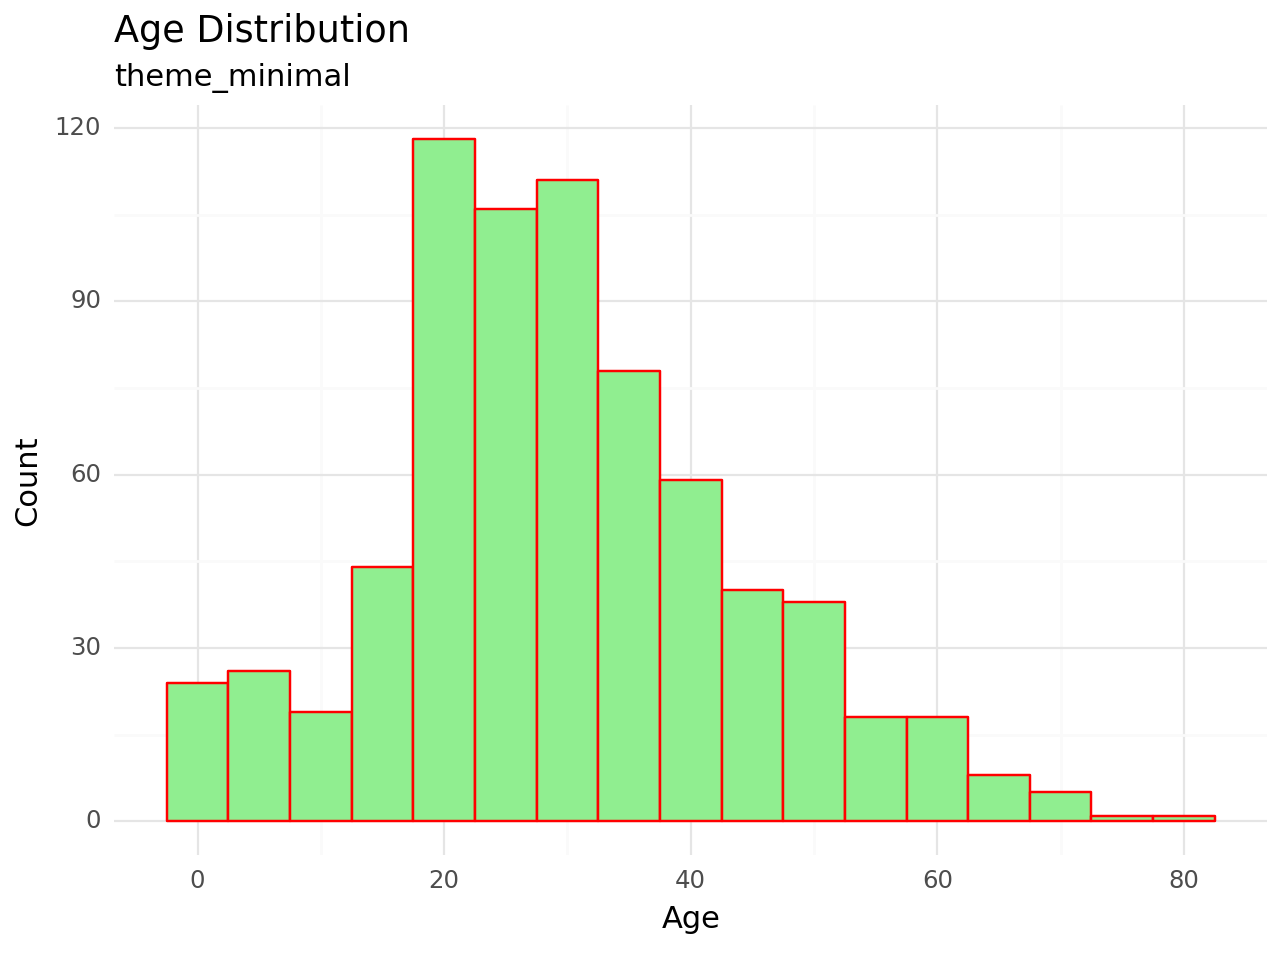

<Figure Size: (640 x 480)>

In [3]:
# Histogram of Age


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


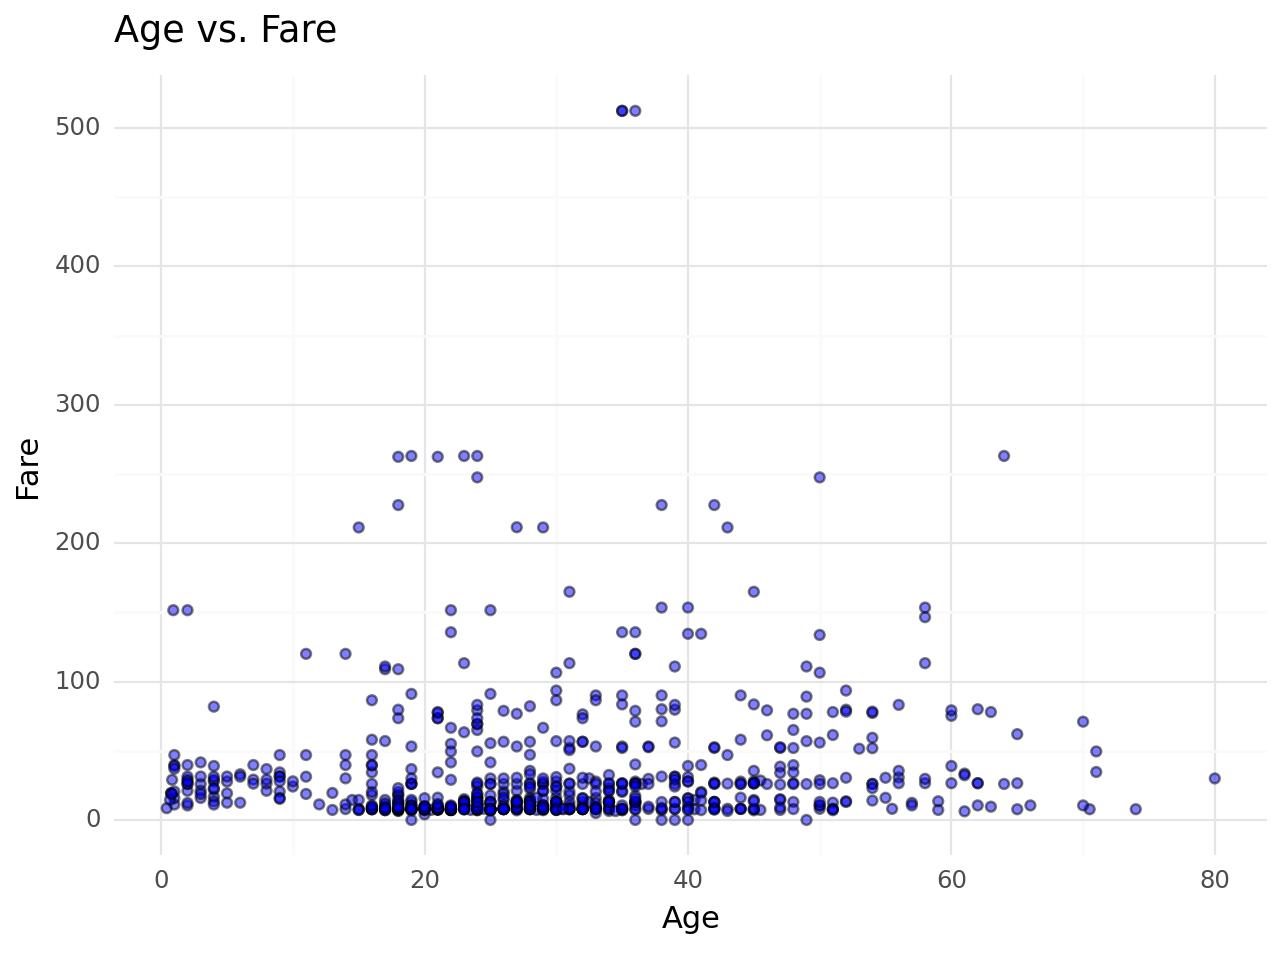

In [4]:
# 6. Scatter plot of Age vs. Fare


   Pclass   Survived
0       1  62.962963
1       2  47.282609
2       3  24.236253


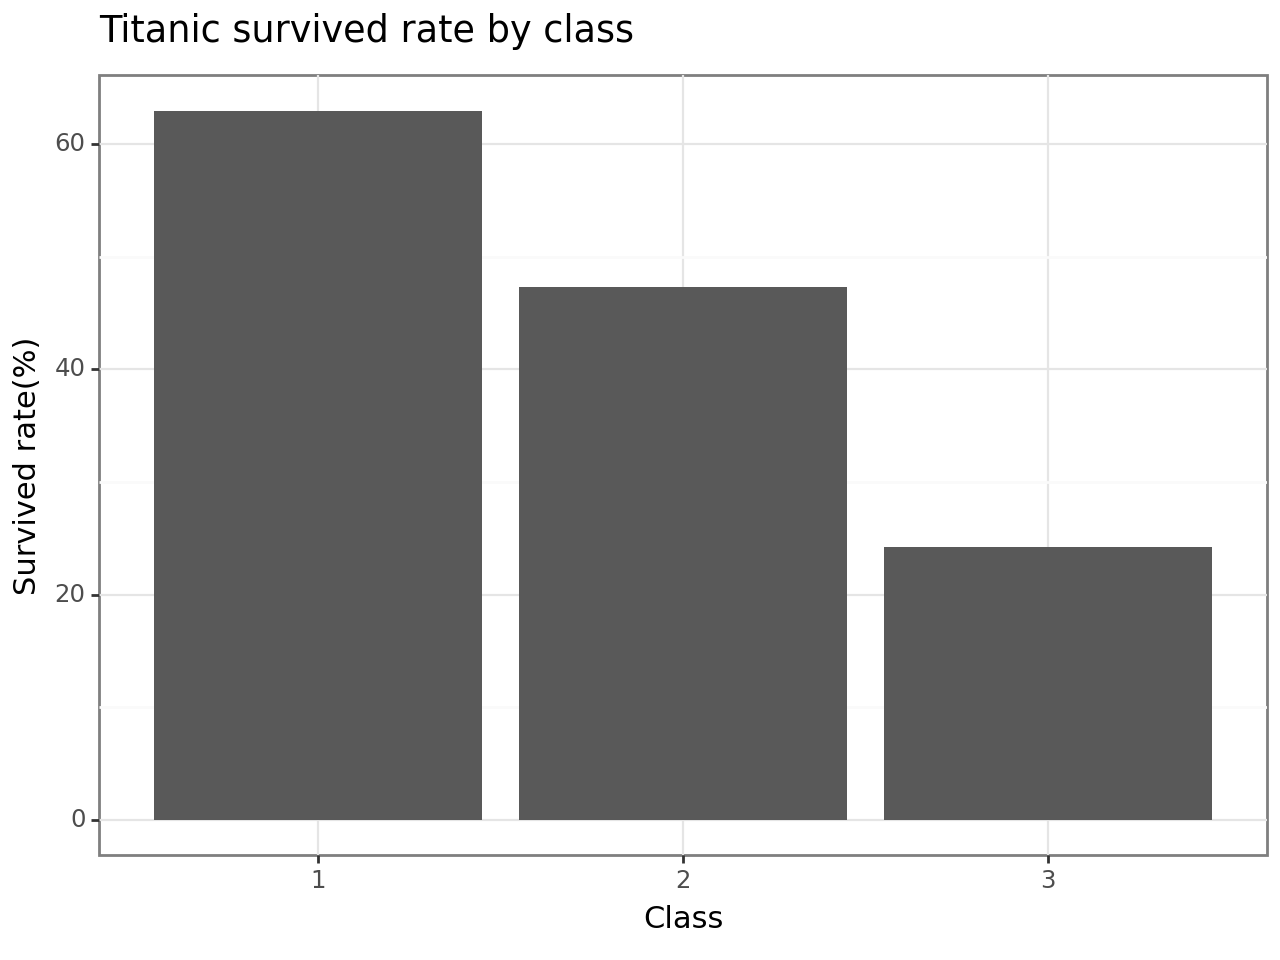

<Figure Size: (640 x 480)>

   Pclass     Sex   Survived
0       1  female  96.808511
1       1    male  36.885246
2       2  female  92.105263
3       2    male  15.740741
4       3  female  50.000000
5       3    male  13.544669


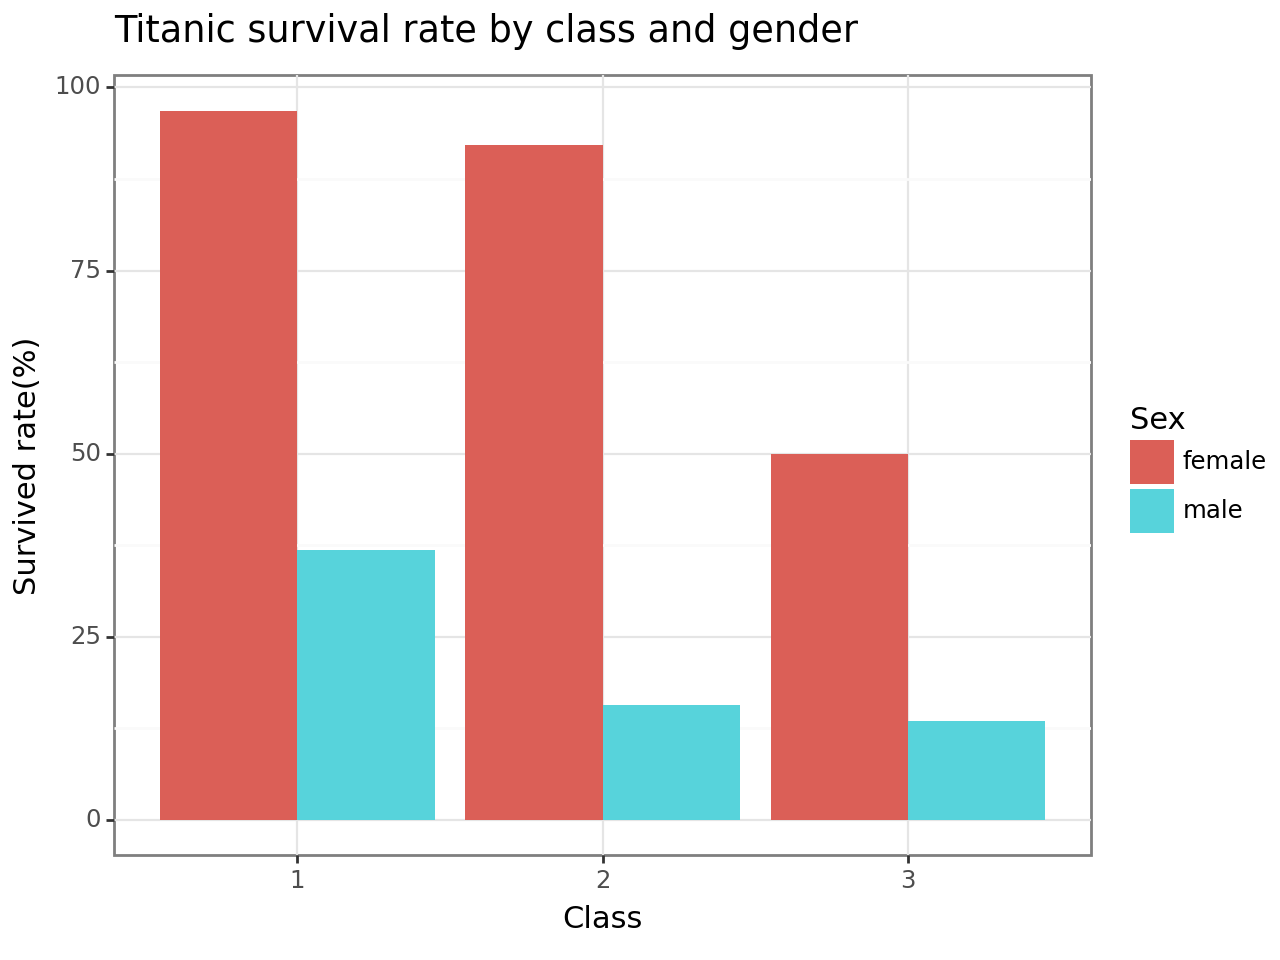

<Figure Size: (640 x 480)>

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


S    644
C    168
Q     77
Name: Embarked, dtype: int64

  Embarked  SurvivalRate  count_number  fare_min  fare_max
0        C      0.553571           168    4.0125  512.3292
1        Q      0.389610            77    6.7500   90.0000
2        S      0.336957           644    0.0000  263.0000


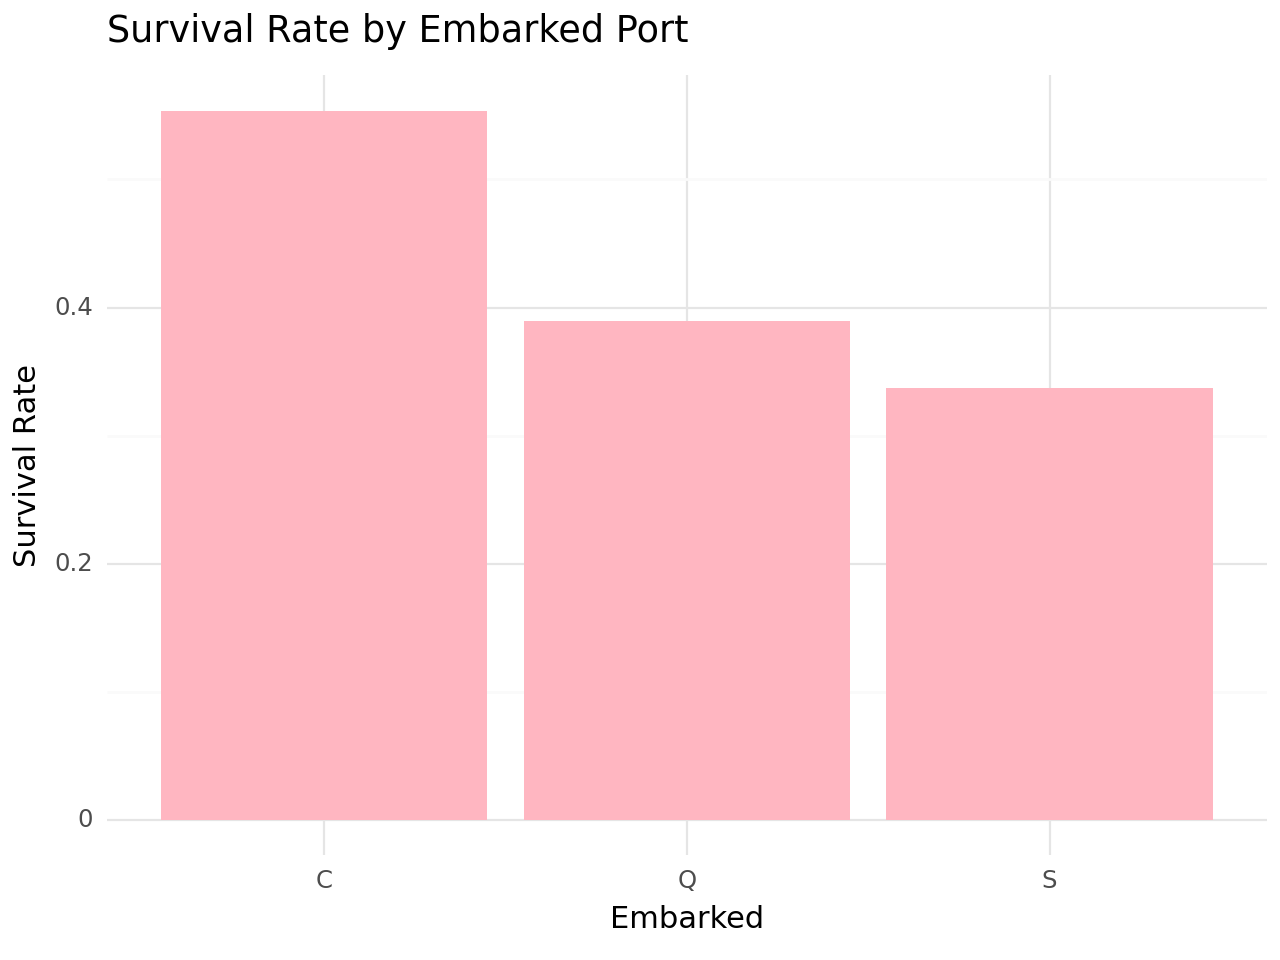

In [8]:
# Bar plot of survival rate by 'Embarked' port
